In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from matplotlib import style
#style.use('fivethirtyeight')
import pandas as pd

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
period = pd.read_csv('Period.csv')

In [3]:
user = pd.read_csv('User.csv',usecols=['id','cycle_length_initial','period_length_initial'])
symptom = pd.read_csv('Symptom.csv', usecols = ['user_id','acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','date'])

In [4]:
count = len(user.id)

In [5]:
period['user_id'] = period['User_id']
    

In [6]:
period.dropna()

,id,start_date,end_date,User_id,user_id
0,352,5/4/15,10/4/15,252,252
1,353,23/3/15,27/3/15,253,253
2,354,6/4/15,11/4/15,254,254
3,355,21/3/15,24/3/15,255,255
4,356,26/3/15,31/3/15,256,256
5,357,10/3/15,15/3/15,257,257
6,358,11/4/15,15/4/15,257,257
7,359,11/3/15,15/3/15,258,258
8,360,11/4/15,15/4/15,258,258
9,361,1/3/15,6/3/15,259,259


In [7]:
user['user_id'] = user['id']

In [8]:
data1 = pd.merge(symptom,user[["id","cycle_length_initial","period_length_initial","user_id"]],on = 'user_id')

In [9]:
data_ = pd.merge(data1,period[["id","start_date","end_date","User_id","user_id"]],on = 'user_id')

In [10]:
data = data_[["user_id","acne","backache","bloating","cramp","diarrhea","dizzy","headache","mood","nausea","sore","date","cycle_length_initial","period_length_initial","start_date","end_date"]]

In [11]:
data = data.dropna()
data.reset_index(drop=True, inplace=True)
from datetime import datetime
date_start= []
for i in range(len(data.start_date.values)):
    try:
        x = data.start_date.values[i].split('/')
        date_start.append(datetime(int(x[2]),int(x[1]),int(x[0])))
    except:
        x = data.start_date.values[i].split('-')
        date_start.append(datetime(int(x[0]),int(x[1]),int(x[2])))

In [12]:
data['date_start'] = date_start

In [13]:
date_end= []
for i in range(len(data.end_date.values)):
    try:
        x = data.end_date.values[i].split('/')
        date_end.append(datetime(int(x[2]),int(x[1]),int(x[0])))
    except:
        x = data.end_date.values[i].split('-')
        date_end.append(datetime(int(x[0]),int(x[1]),int(x[2])))

In [14]:
data['date_end'] = date_end

In [15]:
ave_period = [(date_end[i] - date_start[i]).days for i in range(len(date_start))]

In [16]:
len(ave_period)

182279

In [17]:
idx_drop = []
for i in range(len(ave_period)):
    if ave_period[i] > 10:
        idx_drop.append(i)

In [18]:
len(idx_drop)

1859

In [19]:
for i in range(len(idx_drop)):
    try:
        data.drop(idx_drop[i])
    except:
        print(i)

In [20]:
from collections import defaultdict
def get_date_start(user_id,data):
    x = data.loc[data['user_id'] == user_id]
    date = x.date_start.values
    return date

In [21]:
def get_from_start(date,start_date,user_id):
    sub = []
    try:
        x = date.split('/')
        date = datetime(int(x[2]),int(x[1]),int(x[0]))
    except:
        x = date.split('-')
        date= datetime(int(x[0]),int(x[1]),int(x[2]))
    for i in range(len(start_date[user_id])):
        sub.append(abs((date-start_date[user_id][i]).days))
        #print(user_id)
        #print(sub)
    return min(sub)

In [22]:
day_from = []
starts = defaultdict()
for i in range(len(data.user_id.unique())):
    if data.user_id.unique()[i] not in starts.keys():
        starts[data.user_id.unique()[i]] = get_date_start(data.user_id.unique()[i],data)
    else:
        pass

In [23]:
day_from = []
for i in range(len(data.user_id.values)):
    from_starts = get_from_start(data.date.values[i],starts,data.user_id.values[i])
    day_from.append(from_starts)    

In [24]:
len(day_from)

182279

In [25]:
data['day_from'] = day_from

In [26]:
#data = data[['acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','cycle_length_initial','period_length_initial','day_from']]
data.to_csv('clean_data.csv')

In [27]:
data = pd.read_csv('clean_data.csv')
#data = data[['acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','cycle_length_initial','period_length_initial','day_from']]


In [28]:
data = data.drop("Unnamed: 0", axis = 1)

In [29]:
data

,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,cycle_length_initial,period_length_initial,start_date,end_date,date_start,date_end,day_from
0,252,0,0,0,0,0,0,0,0,0,0,11/4/15,28,6,5/4/15,10/4/15,0015-04-05 00:00:00,0015-04-10 00:00:00,6
1,252,50,50,0,0,0,0,0,0,0,0,13/4/15,28,6,5/4/15,10/4/15,0015-04-05 00:00:00,0015-04-10 00:00:00,8
2,252,0,0,0,0,0,0,0,0,0,0,17/4/15,28,6,5/4/15,10/4/15,0015-04-05 00:00:00,0015-04-10 00:00:00,12
3,257,0,0,0,46,0,0,0,0,0,0,10/4/15,30,6,10/3/15,15/3/15,0015-03-10 00:00:00,0015-03-15 00:00:00,1
4,257,0,0,0,46,0,0,0,0,0,0,10/4/15,30,6,11/4/15,15/4/15,0015-04-11 00:00:00,0015-04-15 00:00:00,1
5,257,0,0,0,0,0,27,48,0,0,0,11/4/15,30,6,10/3/15,15/3/15,0015-03-10 00:00:00,0015-03-15 00:00:00,0
6,257,0,0,0,0,0,27,48,0,0,0,11/4/15,30,6,11/4/15,15/4/15,0015-04-11 00:00:00,0015-04-15 00:00:00,0
7,257,0,0,0,0,0,0,47,0,0,0,12/4/15,30,6,10/3/15,15/3/15,0015-03-10 00:00:00,0015-03-15 00:00:00,1
8,257,0,0,0,0,0,0,47,0,0,0,12/4/15,30,6,11/4/15,15/4/15,0015-04-11 00:00:00,0015-04-15 00:00:00,1
9,263,0,0,0,0,0,0,0,0,0,0,11/4/15,28,4,7/4/15,10/4/15,0015-04-07 00:00:00,0015-04-10 00:00:00,4


In [60]:
df3 = data[~(data['day_from'] > 60)]
df3 = data[['acne','backache','bloating','cramp','diarrhea','dizzy','headache','mood','nausea','sore','cycle_length_initial','period_length_initial','day_from']]
df3.to_csv('final_before_scale.csv')

In [62]:
"""from sklearn import preprocessing
dataset1_standardized = preprocessing.scale(df3)
dataset1_standardized = pd.DataFrame(dataset1_standardized)"""
from sklearn.cluster import KMeans

In [63]:
df3

,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,cycle_length_initial,period_length_initial,day_from
0,0,0,0,0,0,0,0,0,0,0,28,6,6
1,50,50,0,0,0,0,0,0,0,0,28,6,8
2,0,0,0,0,0,0,0,0,0,0,28,6,12
3,0,0,0,46,0,0,0,0,0,0,30,6,1
4,0,0,0,46,0,0,0,0,0,0,30,6,1
5,0,0,0,0,0,27,48,0,0,0,30,6,0
6,0,0,0,0,0,27,48,0,0,0,30,6,0
7,0,0,0,0,0,0,47,0,0,0,30,6,1
8,0,0,0,0,0,0,47,0,0,0,30,6,1
9,0,0,0,0,0,0,0,0,0,0,28,4,4


In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df3)
df3 = scaler.fit_transform(df3)

In [65]:
dataset1_standardized = pd.DataFrame(df3)

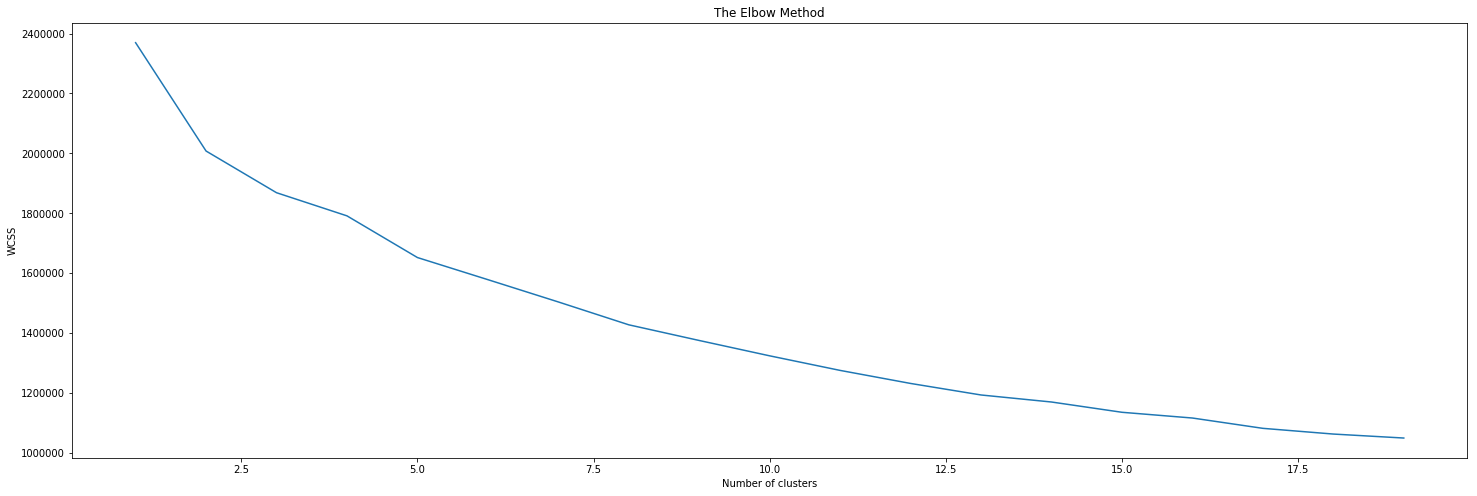

In [34]:
# find the appropriate cluster number
plt.figure(figsize=(25, 8))

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset1_standardized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
kmeans_opt = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_jobs = 2,verbose=1)
kmeans_opt.fit(dataset1_standardized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=2, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=1)

In [36]:
# sorting by first name 
dataset1_standardized['user_id'] = data['user_id']

In [37]:
dataset1_standardized

,0,1,2,3,4,5,6,7,8,9,10,11,12,user_id
0,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,-0.028902,252
1,1.870883,1.014035,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,-0.003982,252
2,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,0.045857,252
3,-0.516019,-0.662306,-0.693607,0.496800,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
4,-0.516019,-0.662306,-0.693607,0.496800,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
5,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,1.113249,1.135021,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.103661,257
6,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,1.113249,1.135021,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.103661,257
7,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,1.099154,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
8,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,1.099154,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
9,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,-0.804188,-0.053822,263


In [38]:
dataset1_standardized.sort_values("user_id", inplace = True) 
  
# dropping ALL duplicte values 
dataset1_standardized.drop_duplicates(keep = "first", inplace = True) 

In [39]:
dataset1_standardized.reset_index().drop('index',axis = 1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,user_id
0,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,-0.028902,252
1,1.870883,1.014035,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,-0.003982,252
2,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,0.045857,252
3,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-0.145702,0.103536,-0.028902,254
4,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,2.540886,-0.362176,-0.566527,0.675217,-0.804188,0.207836,255
5,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,-1.377080,0.103536,0.207836,256
6,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,-0.364291,1.099154,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
7,-0.516019,-0.662306,-0.693607,-0.850472,-0.392086,1.113249,1.135021,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.103661,257
8,-0.516019,-0.662306,-0.693607,0.496800,-0.392086,-0.364291,-0.586606,-0.636973,-0.362176,-0.566527,0.675217,0.103536,-0.091201,257
9,2.873382,-0.662306,0.789819,-0.850472,-0.392086,-0.364291,-0.586606,1.047292,-0.362176,-0.566527,-0.145702,-0.350326,-0.103661,262


In [40]:
dataset1_standardized.to_csv('standardised.csv')

In [70]:
dataset1_standardized[[0,1]]

,0,1
0,-0.516019,-0.662306
1,1.870883,1.014035
2,-0.516019,-0.662306
3,-0.516019,-0.662306
4,-0.516019,-0.662306
5,-0.516019,-0.662306
6,-0.516019,-0.662306
7,-0.516019,-0.662306
8,-0.516019,-0.662306
9,-0.516019,-0.662306


In [42]:
from sklearn import linear_model
y = dataset1_standardized[[0,1,2,3,4,5,6,7,8,9]]
X = dataset1_standardized[[10,11,12]]

In [43]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [44]:
model.predict(np.array([-0.145702,0.103536,-0.028902]).reshape(1, -1))

array([[ 0.02433688, -0.03767285, -0.05990091, -0.05362506, -0.03690508,
        -0.00185488, -0.04575098,  0.01431693, -0.00353711, -0.04053973]])

In [45]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
mod = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=30,
                                                          random_state=0))
mod.fit(X,y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
           n_jobs=1)

In [46]:
mod.predict(np.array([-0.145702,0.103536,-0.028902]).reshape(1, -1))

array([[ 0.06154174, -0.33657525, -0.35303633, -0.60512042, -0.25656142,
        -0.21517479, -0.27830718, -0.19359551, -0.22287237, -0.18156012]])

In [47]:
from sklearn.ensemble import AdaBoostRegressor
mod1 = MultiOutputRegressor(AdaBoostRegressor(n_estimators=100,loss = 'square', learning_rate=0.0001))
mod1.fit(X,y)

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=None, learning_rate=0.0001, loss='square',
         n_estimators=100, random_state=None),
           n_jobs=1)

In [48]:
a = mod1.predict(np.array([-0.145702,0.103536,-0.028902]).reshape(1, -1))

In [49]:
out = list(a[0])
out

[-0.016200400541939972,
 -0.24922128540781732,
 -0.2631745742413387,
 -0.43448526383565994,
 -0.17129211681361198,
 -0.09716961602396815,
 -0.2045778454454885,
 -0.0907237214744713,
 -0.10218403351032702,
 -0.08114075538752577]

In [50]:
xyz = out + [-0.145702,0.103536,-0.028902]

In [71]:
scaler.inverse_transform(xyz)

array([10.47001966, 12.32102729, 13.05724589, 14.20307249,  4.21415497,
        4.88127584, 10.65116876, 17.18921095,  4.89403021, 13.54432147,
       27.99999947,  5.99999923,  6.00000472])

In [52]:
from sklearn.externals import joblib

In [66]:
filename = 'finalized_model.sav'
joblib.dump(mod1, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
out = loaded_model.predict(np.array([-0.145702,0.103536,-0.028902]).reshape(1, -1))
xzy = list(out[0]) + [-0.145702,0.103536,-0.028902]
z = scaler.inverse_transform(xzy)

In [69]:
np.argsort(z)

df3

AttributeError: 'numpy.ndarray' object has no attribute 'keys'